# Анализ задержанных посылок с опасным грузом за месяц

# Предобработка

## Загружаем библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Загружаем данные из Москвы

In [3]:
data_msk=pd.read_excel("C:/Users/Natalya/Desktop/Октябрь 2024/ОКТЯБРЬ 2024 Операторы МСК.xlsx")

**Так как данные по каждому дню хранятся на разных листах Excel файла, считываем названия листов, чтоб потом их объединить**

In [4]:
sheet_names = pd.read_excel("C:/Users/Natalya/Desktop/Октябрь 2024/ОКТЯБРЬ 2024 Операторы МСК.xlsx", sheet_name=None).keys()


In [5]:
sheet_names

dict_keys(['Автозаполнение', 'Не копировать(старый шаблон)', 'Сегодня АХ', 'Шаблон новый', 'ОГ Срочка', 'Лист134', '01.10', '02.10', 'Шаблон ог', 'СЗ', 'Шаблон АХ', '03.10', '04.10', '05.10', '06.10', '07.10', '09.10', '08.10', '10.10', '11.10', '12.10', '13.10', '14.10', '15.10', '16.10', '17.10', '18.10', '19.10', '20.10', '21.10', '22.10', '23.10', '24.10', '25.10', '26.10', '27.10', '28.10', '29.10', '30.10', '31.10', 'ИМ асист', 'Сроки по областям', 'Первичный приход', 'Полки', 'Транзиты', 'Сроки доставки ', 'Сроки доставки эк4', 'Ключевые клиенты', 'Принимает не принимает ОГ', 'Принимает не принимает ОГ 2', 'Шаблон ог с ах', 'АХ 05.07', 'АХ 06.07', 'Кол-во груза', 'Закреплённые менеджеры', 'Проба 2'])

**Отбираем только нужные для анализа листы и соединяем их в одну базу данных**

In [6]:
date_list=[]
for i in sheet_names:
    if len(i)<6 and i!='Полки' and i!='СЗ':
        date_list.append(i)

In [7]:
df_msk = pd.DataFrame() 
for i in date_list:
    sheet_names=pd.read_excel("C:/Users/Natalya/Desktop/Октябрь 2024/ОКТЯБРЬ 2024 Операторы МСК.xlsx", sheet_name=i)
    sheet_names['Дата']=i
    sheet_names['Склад']="Мск"
    df_msk = pd.concat([df_msk, sheet_names]) 

## Загружаем данные из Санкт-Петербурга, Екатеринбурга и Новосибирска

In [8]:
df_spb=pd.read_excel('C:/Users/Natalya/Desktop/Октябрь 2024/Cпб.xlsx',sheet_name='Октябрь 2024')

In [9]:
df_spb["Склад"]="Спб"

In [10]:
df_ekb=pd.read_excel('C:/Users/Natalya/Desktop/Октябрь 2024/Опасный Груз ЕКБ.xlsx',sheet_name='Октябрь 24')

In [11]:
df_ekb["Склад"]="Екб"

In [12]:
df_nsk=pd.read_excel("C:/Users/Natalya/Desktop/Октябрь 2024/ОГ ОКТЯБРЬ 2024 НОВОСИБИРСК.xlsx",sheet_name='ОГ ОКТЯБРЬ 2024')

In [13]:
df_nsk["Склад"]="Нск"

In [14]:
list_df=[df_msk,df_spb,df_nsk,df_ekb]

## Изучаем общую информацию, удаляем ненужные столбцы и переименовываем часть столбцов, чтобы в дальнейшем соединить данные из таблиц разных городов.

**Изучаем данные из Москвы**

In [15]:
df_msk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25830 entries, 0 to 528
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               25829 non-null  object 
 1   Номер заказа             4983 non-null   float64
 2   Адресное хранение        22640 non-null  object 
 3   Причина задержки         16687 non-null  object 
 4   Описание вложения        16721 non-null  object 
 5   Ссылка на фото           16722 non-null  object 
 6   Плательщик               4983 non-null   object 
 7   Город владельца выручки  4983 non-null   object 
 8   Готовое СЗ               17536 non-null  object 
 9   Город получателя         4983 non-null   object 
 10  Первичный приход         5223 non-null   object 
 11  срок доставки            4930 non-null   float64
 12  ШК места                 4983 non-null   object 
 13  Вес к оплате, кг         4983 non-null   float64
 14  вспомогательно1          1755

**Удаляем столбцы, которые нам дальше не понадобятся. Несколько столбцов переименовываем**

In [16]:
df_msk.drop(['Unnamed: 0','Адресное хранение','Ссылка на фото','Город владельца выручки',
                            'Готовое СЗ ','срок доставки','вспомогательно1', 'вспомогательно2',
                            'вспомогательно3','вспомогательно4','Город получателя','Дата'], axis=1, inplace=True)

In [17]:
df_msk.rename(columns = {'Номер заказа':'Накладная', 'ШК места':'Количество мест','Вес к оплате, кг':'Общий вес',
                        'Первичный приход':'Подразделение','Плательщик':'Клиент'}, inplace = True )

In [18]:
df_msk=df_msk[['Склад','Накладная','Описание вложения','Причина задержки','Подразделение','Клиент','Общий вес']]

**Изучаем данные из Санкт-Петербурга**

In [19]:
df_spb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   № накладной        954 non-null    int64 
 1   Причина задержки   954 non-null    object
 2   Описание вложения  954 non-null    object
 3   Плательщик         954 non-null    object
 4   Подразделение      954 non-null    object
 5   ШК места           954 non-null    object
 6   Вес к оплате, кг   954 non-null    object
 7   Склад              954 non-null    object
dtypes: int64(1), object(7)
memory usage: 59.8+ KB


In [20]:
df_spb.rename(columns = {'№ накладной':'Накладная', 'ШК места':'Количество мест','Вес к оплате, кг':'Общий вес','Плательщик':'Клиент'}, inplace = True )

In [21]:
df_spb=df_spb[['Склад','Накладная','Описание вложения','Причина задержки','Подразделение','Клиент','Общий вес']]

**Изучаем данные из Новосибирска**

In [22]:
df_nsk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   № накладной        104 non-null    int64 
 1   Причина задержки   104 non-null    object
 2   Описание вложения  102 non-null    object
 3   Плательщик         104 non-null    object
 4   Подразделение      104 non-null    object
 5   ШК места           104 non-null    object
 6   Вес к оплате, кг   104 non-null    object
 7   Склад              104 non-null    object
dtypes: int64(1), object(7)
memory usage: 6.6+ KB


In [23]:
df_nsk.rename(columns = {'№ накладной':'Накладная', 'ШК места':'Количество мест','Вес к оплате, кг':'Общий вес','Плательщик':'Клиент'}, inplace = True )

In [24]:
df_nsk=df_nsk[['Склад','Накладная','Описание вложения','Причина задержки','Подразделение','Клиент','Общий вес']]

**Изучаем данные из Екатеринбурга**

In [25]:
df_ekb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Дата              59 non-null     datetime64[ns]
 1   Накладная         61 non-null     float64       
 2   Вложение          60 non-null     object        
 3   Классификация     59 non-null     object        
 4   Принявший Офис    59 non-null     object        
 5   Название Клиента  59 non-null     object        
 6   Общий вес         58 non-null     object        
 7   Количество мест   59 non-null     float64       
 8   Ссылка на фото    63 non-null     object        
 9   Склад             63 non-null     object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 5.1+ KB


In [26]:
df_ekb.drop(['Дата','Ссылка на фото '], axis=1, inplace=True)

In [27]:
df_ekb.rename(columns = {'Вложение':'Описание вложения', 'Принявший Офис':'Подразделение','Классификация':'Причина задержки'
                        ,'Название Клиента':'Клиент'}, inplace = True )

In [28]:
df_ekb=df_ekb[['Склад','Накладная','Описание вложения','Причина задержки','Подразделение','Клиент','Общий вес']]

## Соединяем таблицы из четырех городов в одну

In [29]:
df_all = pd.concat([df_msk, df_spb, df_nsk, df_ekb]) 

**Изучаем пропущенные значения**

In [30]:
df_all.isna().sum()

Склад                    0
Накладная            20849
Описание вложения     9114
Причина задержки      9147
Подразделение        20611
Клиент               20851
Общий вес            20852
dtype: int64

**Обрабатываем пропущенные значения**

In [31]:
df_all = df_all.dropna(subset=['Накладная' ,'Клиент'])
df_all = df_all.dropna(subset=['Клиент'])
df_all = df_all.dropna(subset=['Подразделение'])
df_all['Причина задержки'].fillna('нет инфо', inplace=True)
df_all['Общий вес'].fillna('нет инфо', inplace=True)

**Удаляем дубликаты**

In [32]:
df_all.drop_duplicates(subset=['Накладная',], inplace=True)

### Присоединяем данные о наличии договора и является подразделение Филиалом или ПВЗ

In [33]:
filial=pd.read_excel('C:/Users/Natalya/Desktop/Отчеты по ОГ/Филиалы.xlsx')

In [34]:
contract=pd.read_excel("C:/Users/Natalya/Desktop/Октябрь 2024/Договоры.xlsx")

In [35]:
df_all=df_all.merge(contract, on='Накладная', how='left')

In [36]:
df_all=df_all.merge(filial, on='Подразделение', how='left')

In [37]:
df_all['Филиал'].fillna('ПВЗ', inplace=True)

**Меняем тип данный в столбце Накладная**

In [38]:
df_all['Накладная'] = df_all['Накладная'].astype(str)

## Во избежание разглашения конфиденциальной информации, меняем из начальных данных Номер накладной, Клиент, Подразделение.

In [39]:
for i in range(len(df_all)):
    df_all['Накладная'][i]=df_all['Накладная'][i][:-4]+'****'    

In [40]:
new_Подразделение=df_all['Подразделение'].value_counts().sort_index(ascending=True)
new_Подразделение=new_Подразделение.reset_index()
new_Подразделение['new_Подразделение']=pd.NA
for i in range(len(new_Подразделение)):
    new_Подразделение['new_Подразделение'][i]=f'Подразделение {i+1}'
new_Подразделение=new_Подразделение[['Подразделение','new_Подразделение']]

In [41]:
new_Клиент=df_all['Клиент'].value_counts().sort_index(ascending=True)
new_Клиент=new_Клиент.reset_index()
new_Клиент['new_Клиент']=pd.NA
for i in range(len(new_Клиент)):
    new_Клиент['new_Клиент'][i]=f'Клиент {i+1}'
new_Клиент=new_Клиент[['Клиент','new_Клиент']]

In [42]:
df_all=df_all.merge(new_Клиент, on='Клиент', how='left')

In [43]:
df_all=df_all.merge(new_Подразделение, on='Подразделение', how='left')

In [44]:
df_all=df_all[['Склад','Накладная','Описание вложения','Причина задержки','new_Подразделение','new_Клиент','Общий вес','Филиал']]

In [45]:
df_all.rename(columns={'new_Накладная':'Накладная','new_Подразделение':'Подразделение','new_Клиент':'Клиент'},inplace=True)

In [46]:
df_all.head(10)

,Склад,Накладная,Описание вложения,Причина задержки,Подразделение,Клиент,Общий вес,Филиал
0,Мск,100354203****,химическое вещество,Необходим паспорт безопасности MSDS.,Подразделение 816,Клиент 6,2.8,ПВЗ
1,Мск,100355194****,духи,9 класс опасности.,Подразделение 830,Клиент 106,0.8,ПВЗ
2,Мск,100355955****,неизвестное вещество,Отправка авиа запрещена.,Подразделение 830,Клиент 40,3.29,ПВЗ
3,Мск,100354197****,акб,Отправка авиа запрещена.,Подразделение 874,Клиент 41,4.0,ПВЗ
4,Мск,100354856****,духи,9 класс опасности.,Подразделение 1190,Клиент 114,4.0,ПВЗ
5,Мск,100350237****,спирт,0,Подразделение 617,Клиент 101,5.0,ПВЗ
6,Мск,100353677****,газлифт,,Подразделение 971,Клиент 103,1.0,ПВЗ
7,Мск,100353947****,аэрозоль,0,Подразделение 835,Клиент 135,0.68,Филиал
8,Мск,100353895****,духи,9 класс опасности.,Подразделение 1067,Клиент 176,2.94,ПВЗ
9,Мск,100348052****,акб,Отправка авиа запрещена.,Подразделение 696,Клиент 201,36.0,ПВЗ


## Предобрабатываем описание вложения

**Приведем значения к нижнему регистру и удалим пробелы в начале слова**

In [47]:
df_all['Описание вложения']=df_all['Описание вложения'].str.lower()
df_all['Причина задержки']=df_all['Причина задержки'].str.lower()
df_all['Описание вложения'] = df_all['Описание вложения'].str.strip()

**Укрупняем группы**

In [48]:
slovar_og= {
    'ароматизатор':['ароматизатор','эфирные масла','эфирное масло','диффузор','ароматизаторъ'],
    'неизвестное вещество':['неизвестное вещество','неизвестное вщество','неизвестная жидкость'],
    'косметика 9 класс':['лак для ногтей','косметика','лаки в большом количестве'],
    'духи':['духи','парфюм','парфюмерия'],
     "свеча":['свеча','свечи'],
     'гсм':['деталь со следами гсм','деталь в масле',' двс','двс','запчасть в масле','запчасть с гсм','бензобак',
     'деталь ГСМ',' запчасть с запахом гсм', " б/у запчасть",'запчасть б/у','бу деталь','деталь в гсм','3апчасти','б/у запчасть'],
     "химическое вещество":['химическое вещество','нужен пб','огнеопасное вещество','хим вещ-во','хим вещ-во ','удобрения',
                           'огнеопасно','герметик','коррозийное вещество','химичекое вещество','лодка с клеем','химвещество'
                           'емкости','емкость','хим.вещество','хим вещество'],
     "акб":['акб','ибп','гидроакб','гидроаккумулятор','свинцово-кислотная акб',' акб'],
     "автохимия":['автохимия',"масло","моторное масло",'машинное масло'],
     "амортизатор":['амортизаторы','амортизатор'],
     'баллон':['баллон','баллончик','баллончики',"огнетушитель",'баллоны под давлением']

    }

In [49]:
for i in range(len(df_all)):
    for key in slovar_og:
        if df_all['Описание вложения'][i] in slovar_og[key]:
            df_all['Описание вложения'][i]=key

In [50]:
dictionary_og=pd.read_excel('C:/Users/Natalya/Desktop/Отчеты по ОГ/Словарь ОГ.xlsx')

In [51]:
df_all=df_all.merge(dictionary_og, on='Описание вложения', how='left')

In [52]:
df_all=df_all[['Склад','Накладная','Описание вложения','причина задержки','Подразделение','Клиент','Общий вес','Филиал']]

In [53]:
df_all.rename(columns = {'причина задержки':'Причина задержки'}, inplace = True )

## Получаем итоговую таблицу для анализа данных.

In [54]:
df_all

,Склад,Накладная,Описание вложения,Причина задержки,Подразделение,Клиент,Общий вес,Филиал
0,Мск,100354203****,химическое вещество,груз отстранен из-за отсутствия документов,Подразделение 816,Клиент 6,2.8,ПВЗ
1,Мск,100355194****,духи,груз отстранен из-за отсутствия надбавки за оп...,Подразделение 830,Клиент 106,0.8,ПВЗ
2,Мск,100355955****,неизвестное вещество,груз отстранен из-за ошибки в выборе транспорт...,Подразделение 830,Клиент 40,3.29,ПВЗ
3,Мск,100354197****,акб,груз отстранен из-за ошибки в выборе транспорт...,Подразделение 874,Клиент 41,4.0,ПВЗ
4,Мск,100354856****,духи,груз отстранен из-за отсутствия надбавки за оп...,Подразделение 1190,Клиент 114,4.0,ПВЗ
...,...,...,...,...,...,...,...,...
6021,Екб,100439281****,баллоны,запрещенный к перевозке груз,Подразделение 402,Клиент 3658,"каждое 4,78 3",ПВЗ
6022,Екб,100444468****,аккумулятор,груз отстранен из-за ошибки в выборе транспорт...,Подразделение 376,Клиент 4186,6.7,ПВЗ
6023,Екб,100438551****,баллоны,запрещенный к перевозке груз,Подразделение 1951,Клиент 3084,по 32 кг,ПВЗ
6024,Екб,100457575****,хим. вещество,NaN,Подразделение 381,Клиент 4072,8.36,ПВЗ


# Анализ задержанных посылок с опасным грузом за октябрь

In [55]:
df_all['Накладная'].count()

6026

**Всего за октябрь было задержано 6026 посылки с опасным грузом**

**Рассмотрим распределение количества задержанных посылок в зависимости от города склада**

In [56]:
table=df_all.groupby(['Склад']).count()['Накладная']
table=table.reset_index()
table.sort_values('Накладная', ascending=False )
table

,Склад,Накладная
0,Екб,60
1,Мск,4918
2,Нск,102
3,Спб,946


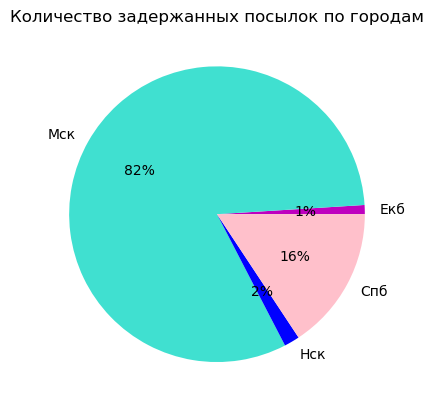

In [57]:
df_all.groupby(['Склад']).count().plot(kind='pie', y='Накладная',autopct='%1.0f%%',
       colors = ['m', 'turquoise', 'b','pink'],title='Количество задержанных посылок по городам',legend = False)
plt.ylabel('')
plt.show()

- **Видим, что большая часть (82%) опасного груза принято в Москве, около 16% в Санкт-Петербурге. В Новосибирске 2% и в Екатеринбурге  1% от общего числа.**

**Рассмотрим отношение подразделений, которые относятся к филиалу и к пунктам выдачи.**

In [58]:
table1=df_all['Филиал'].value_counts()
print(table1)

Филиал
ПВЗ       5072
Филиал     954
Name: count, dtype: int64


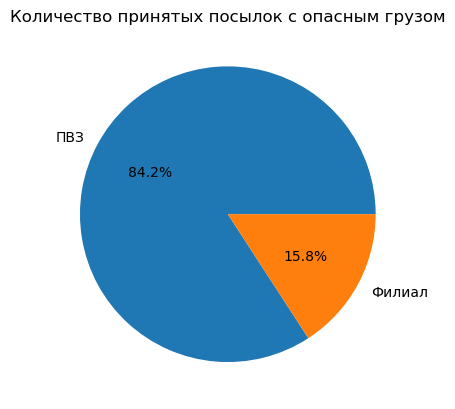

In [59]:
table1.plot(kind='pie',autopct='%1.1f%%',title = 'Количество принятых посылок с опасным грузом')
plt.ylabel('')
plt.show()


**Видим, что большая часть опасного груза была принята на ПВЗ**


## Рассмотрим самых популярных нарушителей

### Клиенты, которые отправили больше всего посылок с ОГ:

In [60]:
table_client=df_all['Клиент'].value_counts()
table_client=table_client.reset_index()
table_client.rename(columns={'count':'Количество отправленных посылок с ОГ'}, inplace=True)

In [61]:
table_client.head(10)

,Клиент,Количество отправленных посылок с ОГ
0,Клиент 895,98
1,Клиент 423,86
2,Клиент 836,68
3,Клиент 780,60
4,Клиент 2624,59
5,Клиент 846,45
6,Клиент 688,41
7,Клиент 723,40
8,Клиент 942,37
9,Клиент 653,27


### Подразделения, которые приняли больше всего посылок с ОГ:

In [62]:
table=df_all['Подразделение'].value_counts().head(10)
table=table.reset_index()
table.rename(columns={'count':'Количество отправленных посылок с ОГ'})

,Подразделение,Количество отправленных посылок с ОГ
0,Подразделение 835,407
1,Подразделение 834,259
2,Подразделение 1637,122
3,Подразделение 1057,72
4,Подразделение 1238,56
5,Подразделение 354,49
6,Подразделение 1621,48
7,Подразделение 1147,46
8,Подразделение 1363,46
9,Подразделение 832,43


## Проанализируем вложения посылок

**Рассмотрим опасные грузы, которые встречаются чаще всего**

In [63]:
inside=df_all['Описание вложения'].value_counts()
inside=inside.reset_index()
inside.head(20)

,Описание вложения,count
0,химическое вещество,1298
1,духи,1200
2,акб,833
3,неизвестное вещество,667
4,аэрозоль,421
5,косметика 9 класс,285
6,амортизатор,270
7,ароматизатор,198
8,свеча,73
9,подушка безопасности,70


In [64]:
for i in range(len(inside)):
    if  inside['count'][i] <50:
        inside['Описание вложения'][i]='Другое'   

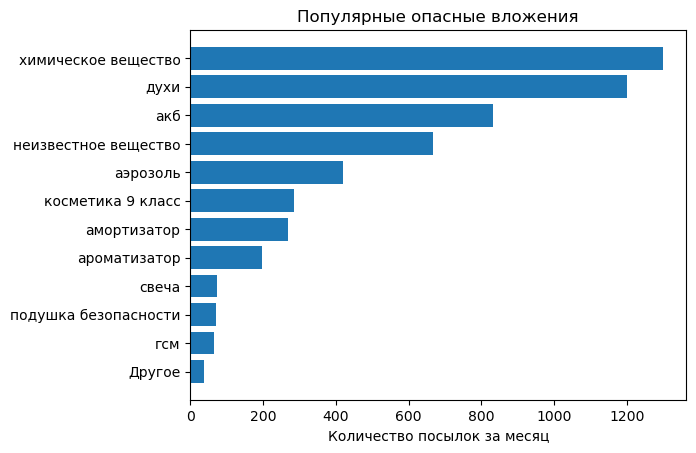

In [65]:
inside=inside.sort_values('count')
plt.barh(inside['Описание вложения'], inside['count'], label='Основные типы ОГ') 
plt.xlabel('Количество посылок за месяц')
plt.title('Популярные опасные вложения')
plt.show()   

**Изучаем причину задержки**

In [66]:
reason=df_all['Причина задержки'].value_counts()
reason=reason.reset_index()
reason

,Причина задержки,count
0,груз отстранен из-за ошибки в выборе транспорт...,2140
1,груз отстранен из-за отсутствия надбавки за оп...,2112
2,груз отстранен из-за отсутствия документов,1441
3,запрещенный к перевозке груз,85
4,прочее,3


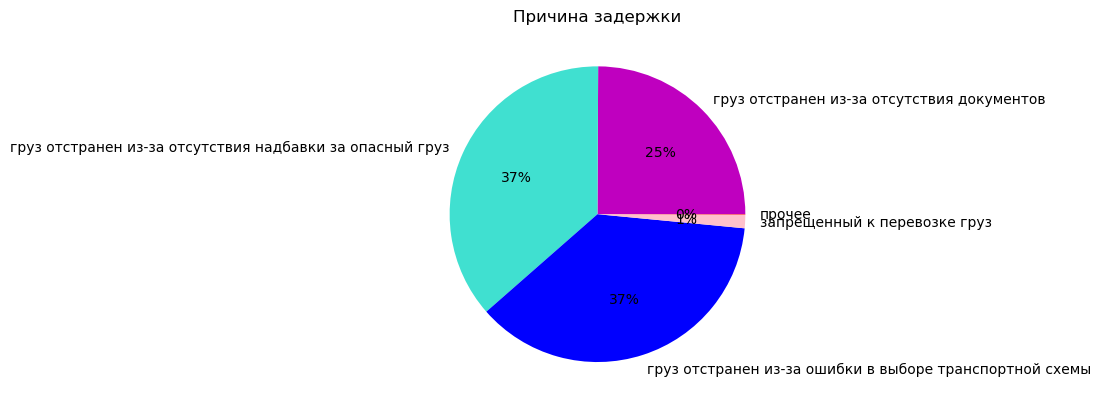

In [67]:
df_all.groupby(['Причина задержки']).count().plot(kind='pie', y='Накладная',autopct='%1.0f%%',
       colors = ['m', 'turquoise', 'b','pink','r'],title='Причина задержки',legend = False)
plt.ylabel('')
plt.show()

**Видим, что 37% посылок были задержаны из-за отсутствия надбавки за опасный груз, 25% из-за отсутствия документов, 37% из-за ошибки в выборе транспортной схемы, около 1 % это запрещенный груз и прочее.**

## Сохраняем готовый отчёт

In [68]:
df_all.to_excel (r'C:/Users/Natalya/Desktop/Отчеты по ОГ/Готовый отчет2.xlsx', index= False )

# Вывод


- Всего за месяц было задержано 6026 посылки с опасным грузом.
- Большая часть (82%) опасного груза принято в Москве, около 16% в Санкт-Петербурге. В Новосибирске 2% и в Екатеринбурге  1% от общего числа.
- 85 % посылок с опасным грузом были приняты на ПВЗ.
- ТОП-5 видов опасного вложения - это химическое вещество, духи, аккумуляторы, неизвестное вещество, аэрозоли.
- 37% посылок были задержаны из-за отсутствия надбавки за опасный груз, 25% из-за отсутствия документов, 37% из-за ошибки в выборе транспортной схемы, около 1 % это запрещенный груз и прочее.
